### Challenge: Iterate and evaluate your classifier

*It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:*

- Do any of your classifiers seem to overfit?
- Which seem to perform the best? Why?
- Which features seemed to be most impactful to performance?

*Write up your iterations and answers to the above questions in a few pages. Submit a link below and go over it with your mentor to see if they have any other ideas on how you could improve your classifier's performance.*

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import string
from collections import Counter

from sklearn.metrics import confusion_matrix

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pbiswas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/pbiswas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data = pd.read_csv("amazon_cells_labelled.txt", delimiter= '\t', header=None)
data.columns = ['review', 'pos']

In [3]:
data.head()

,review,pos
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [4]:
#list(data[data.pos == 1].review)  #all complete pos feedback #list shows full content

#listb(data[data.pos == 0].review)

In [21]:
words = " ".join(data['review']) #joined dataframe to create string

stop = set(stopwords.words('english'))
word_tokens = word_tokenize(words)  #split text into tokens 

tokenized_words = []
for word in word_tokens:
    if word.lower() not in stop and word.lower() not in string.punctuation:
        tokenized_words.append(word)
        
tokenized_count = Counter(tokenized_words).most_common()
#tokenized_count[:50]

In [22]:
# tfidf - incorporate tfidf - run everything thru that and then run thru tokenizer - 
# sparse matrix. - really 

# find the dictionaries with positive keywords and try with that

### Classifier version: 1

In [24]:
# Feature Engineering 

pos_keywords = ['good', 'best', 'excellent', 'fine', 'nice', 'great',
               'satisfied', 'fulfill', 'love', 'easy', 'happy', 'excellent', 
               'recommend', 'impressed', 'incredible', 'well', 'awesome', 'cool',
               'fantastic', 'sturdy' ]

# ':-)' in the keywords created an error

for key in pos_keywords:
    data[str(key)] = data.review.str.contains(' '+ str(key), case=False)

In [26]:
#data.head()

In [27]:
#Features two
pos_intensifiers = ['very', 'pretty', 'highly', 'really', 'perfectly']

for key in pos_intensifiers: 
    data[str(key)] = data.review.str.contains(' ' + str(key) + ' ', case=False)

In [28]:
#data.head()

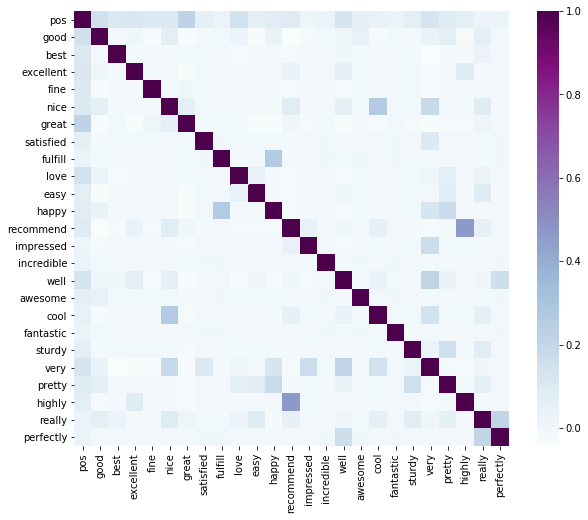

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap='BuPu', square=True)

In [30]:
# Training data 

X = data[pos_keywords + pos_intensifiers]  #sparse matrix, mostly zero and some 1s.
y = data.pos

In [32]:
# Binary data - Bernoulli

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB() # instantiate

# fit model 
bnb.fit(X, y)  #learning which features correspond to a pos senting 

y_pred =  bnb.predict(X)  #.predict in classifier, and .transform in feature selection 

In [13]:
bnb.coef_

array([[-2.30657711, -3.32822836, -3.57954279, -3.65365076, -3.51054992,
        -2.09146573, -4.60916221, -5.52545294, -3.22286785, -3.65365076,
        -3.65365076, -3.57954279, -3.12755767, -4.42684065, -5.52545294,
        -2.72209256, -4.60916221, -4.27268997, -5.52545294, -4.42684065,
        -2.19324843, -4.02137554, -4.13915858, -3.57954279, -5.52545294]])

In [125]:
bnb_idx = np.argsort(bnb.coef_)[0][::-1]  #accessing list within array and reversing it.
#Because argsort sorts indexes for its ascending values 
bnb_idx

array([ 5, 20,  0, 15, 12,  8,  1,  4,  2, 23, 11,  9,  3, 10, 21, 22, 17,
       19, 13,  6, 16,  7, 18, 14, 24])

In [126]:
#np.argsort(bnb.coef_)

In [127]:
print("The important features are: {}".format(X.columns[bnb_idx]))

The important feature s are: Index(['great', 'very', 'good', 'well', 'recommend', 'love', 'best', 'nice',
       'excellent', 'really', 'excellent', 'easy', 'fine', 'happy', 'pretty',
       'highly', 'cool', 'sturdy', 'impressed', 'satisfied', 'awesome',
       'fulfill', 'fantastic', 'incredible', 'perfectly'],
      dtype='object')


In [33]:
confusion_matrix(y, y_pred)

array([[438,  62],
       [231, 269]])

In [34]:
print("Number of mislabeled points out of total {} points: {}".format(
X.shape[0], (y != y_pred).sum()))  #FP + FN

Number of mislabeled points out of total 1000 points: 293


In [35]:
# Transforming nparray to a Series for adding to a dataframe 
y_pred_series = pd.Series(y_pred)

# Creating a dataframe with only y and y_pred for manually calculating confusion matrix 
y_df = pd.concat([y, y_pred_series], axis=1)   ####
y_df.columns = ['y', 'y_pred']

In [36]:
#y_df.head(20)

In [37]:
print("TP: {} \nFP: {} \nTN: {} \nFN: {}".format(y_df.groupby('y').y_pred.value_counts()[0][0], 
y_df.groupby('y').y_pred.value_counts()[1][0],
y_df.groupby('y').y_pred.value_counts()[0][1],
y_df.groupby('y').y_pred.value_counts()[1][1]))
# Calculating confusion matrix manually 
#y_df.groupby('y').y_pred.value_counts()[0][0]
#y_df.groupby('y').y_pred.value_counts()[1][0]
#y_df.groupby('y').y_pred.value_counts()[0][1]
#y_df.groupby('y').y_pred.value_counts()[1][1]

TP: 438 
FP: 231 
TN: 62 
FN: 269


In [ ]:
# try .apply for manually calculating the confusion matrix

#y_df.apply(lambda x: 0 if x["y"] == x["y_pred"] else 1, axis = 1).sum()

In [38]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() *2))

array([0.77, 0.64, 0.73, 0.63, 0.75, 0.72, 0.72, 0.74, 0.71, 0.64])

In [41]:
scores = cross_val_score(bnb, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() *2))

Accuracy: 0.70 (+/- 0.10)


In [87]:
def CV(df_x, df_y, k):
    
    CV_matrix = []
    from sklearn.model_selection import train_test_split
    for fold in np.arange(10):
        X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=k, random_state=None)
    
        from sklearn.naive_bayes import BernoulliNB
        bnb = BernoulliNB()
        bnb.fit(X_train, y_train)

    # Classify, storing the result in a new variable 
        y_pred = bnb.predict(X_test)
        CV_matrix.append(((y_test == y_pred).sum() / len(y_pred)*100))
    print("Cross-validation scores: " + str((CV_matrix)))
    print("Mean of cross validation scores {}".format(round(np.mean(CV_matrix)),2))




In [88]:
CV(X, y, .33)

Cross-validation scores: [69.39393939393939, 72.42424242424242, 72.72727272727273, 70.3030303030303, 68.48484848484848, 66.06060606060606, 70.0, 68.18181818181817, 68.18181818181817, 70.3030303030303]
Mean of cross validation scores 70.0


In [53]:
#for value in np.arange(len(y_df)):
#    if y_df['y_pred'].iloc[value].isin(y_df.y.iloc[value]):
#        print(value)

In [49]:
#df['matches'] = df['material1'].isin(df['material2']).astype(int)
#df = df.groupby(['claim', 'event'], as_index=False)['matches'].sum()

#y_df['matches'] = y_df['y_pred'].value.isin(y_df['y']).astype(int)

### Classifier version: 2 



In [89]:
# Trying countvectorizer 
# Import countvectorizer 

from sklearn.feature_extraction.text import CountVectorizer



In [100]:
# Turn of pretty printing of jupyter notebook which generates long lines
%pprint   # On and OFF with running 

Pretty printing has been turned OFF


In [128]:
clf2 = pd.read_csv("amazon_cells_labelled.txt", delimiter= '\t', header=None)
clf2.columns = ['review', 'pos']

In [133]:
clf2_vec = CountVectorizer(min_df=1, tokenizer=nltk.word_tokenize)

In [139]:
clf2_vec

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function word_tokenize at 0x10a779f28>, vocabulary=None)

In [134]:
clf2_review_count = clf2_vec.fit_transform(clf2)

In [136]:
clf2_vec.vocabulary_

{'review': 1, 'pos': 0}

In [138]:
clf2_review_count.toarray()

array([[0, 1],
       [1, 0]], dtype=int64)

In [52]:
data_yelp = pd.read_csv('yelp_labelled.txt', delimiter='\t', header=None)
data_yelp.columns = ['review', 'pos']

In [53]:
data_yelp.head()

,review,pos
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [54]:
y_yelp = data_yelp.pos

In [55]:
bnb.fit(X, y_yelp) 

y_yelp_pred = bnb.predict(X)

In [56]:
confusion_matrix(y_yelp, y_yelp_pred)

array([[392, 108],
       [337, 163]])

In [57]:
print("Trained Amazon model, tested on Yelp. \nNumber of mislabeled points in the yelp data, \
out of total {} points: {}".format(
X.shape[0], (y != y_yelp_pred).sum()))

Trained Amazon model, tested on Yelp. 
Number of mislabeled points in the yelp data, out of total 1000 points: 345
